Bipolar Transistor
==================

This example shows how to simulate the characteristic curves of a
bipolar transistor.


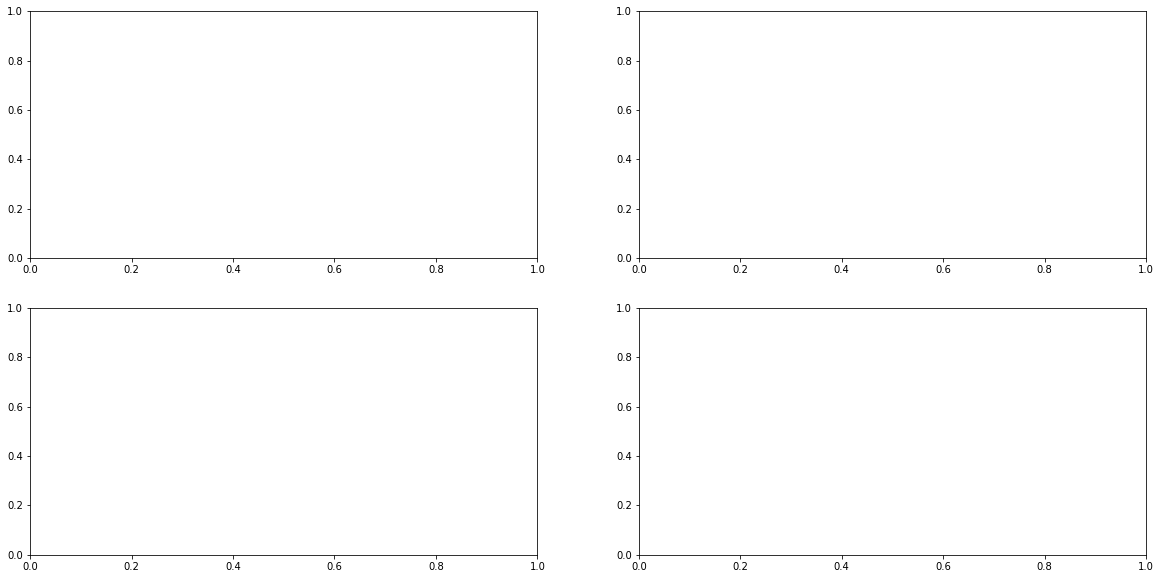

In [ ]:

# Fixme: Complete


import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))




We define a basic circuit to drive an NPN transistor (2n2222a) using two
voltage sources.


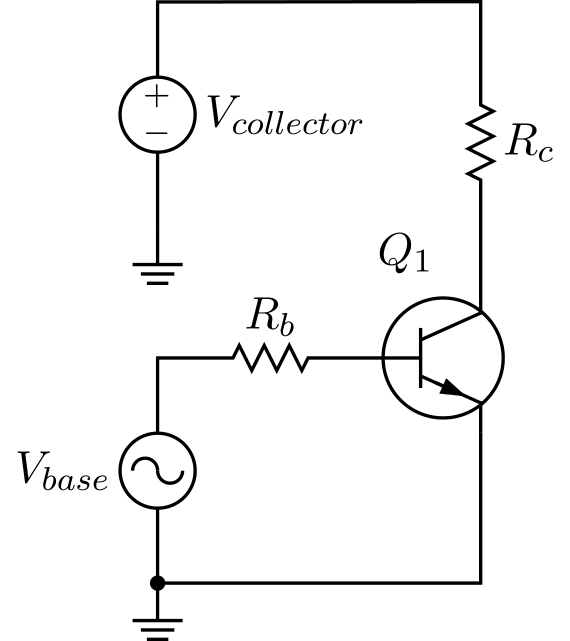

In [ ]:

circuit = Circuit('Transistor')

Vbase = circuit.V('base', '1', circuit.gnd, 1@u_V)
circuit.R('base', 1, 'base', 1@u_kΩ)
Vcollector = circuit.V('collector', '2', circuit.gnd, 0@u_V)
circuit.R('collector', 2, 'collector', 1@u_kΩ)
# circuit.BJT(1, 'collector', 'base', circuit.gnd, model='generic')
# circuit.model('generic', 'npn')
circuit.include(spice_library['2n2222a'])
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='2n2222a')



BipolarJunctionTransistor Q1

We plot the base-emitter diode curve $Ib = f(Vbe)$ using a DC sweep
simulation.


In [ ]:

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vbase=slice(0, 3, .01))

ax1.plot(analysis.base, u_mA(-analysis.Vbase)) # Fixme: I_Vbase
ax1.axvline(x=.65, color='red')
ax1.legend(('Base-Emitter Diode curve',), loc=(.1,.8))
ax1.grid()
ax1.set_xlabel('Vbe [V]')
ax1.set_ylabel('Ib [mA]')




Text(3.200000000000017, 0.5, 'Ib [mA]')

We will now replace the base\'s voltage source by a current source in
the previous circuit.


In [ ]:

circuit = Circuit('Transistor')
Ibase = circuit.I('base', circuit.gnd, 'base', 10@u_uA) # take care to the orientation
Vcollector = circuit.V('collector', 'collector', circuit.gnd, 5)
# circuit.BJT(1, 'collector', 'base', circuit.gnd, model='generic')
# circuit.model('generic', 'npn')
circuit.include(spice_library['2n2222a'])
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='2n2222a')

# Fixme: ngspice doesn't support multi-sweep ???
#   it works in interactive mode


ax2.grid()
# ax2.legend(('Ic(Vce, Ib)',), loc=(.5,.5))
ax2.set_xlabel('Vce [V]')
ax2.set_ylabel('Ic [mA]')
ax2.axvline(x=.2, color='red')

ax3.grid()
# ax3.legend(('beta(Vce)',), loc=(.5,.5))
ax3.set_xlabel('Vce [V]')
ax3.set_ylabel('beta')
ax3.axvline(x=.2, color='red')

for base_current in np.arange(0, 100, 10):
    base_current = base_current@u_uA
    Ibase.dc_value = base_current
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Vcollector=slice(0, 5, .01))
    # add ib as text, linear and saturate region
    # Plot Ic = f(Vce)
    ax2.plot(analysis.collector, u_mA(-analysis.Vcollector))
    # Plot β = Ic / Ib = f(Vce)
    ax3.plot(analysis.collector, -analysis.Vcollector/float(base_current))
    # trans-resistance U = RI   R = U / I = Vce / Ie
    # ax3.plot(analysis.collector, analysis.sweep/(float(base_current)-analysis.Vcollector))
    # Fixme: sweep is not so explicit



/home/fabrice/PySpice/PySpice/Unit/Unit.py:1819: RuntimeWarning: divide by zero encountered in true_divide
  results = super(UnitValues, self).__array_ufunc__(ufunc, method, *args, **kwargs)


Let plot $Ic = f(Ib)$


In [ ]:

ax4.grid()
ax4.set_xlabel('Ib [uA]')
ax4.set_ylabel('Ic [mA]')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Ibase=slice(0, 100e-6, 10e-6))
# Fixme: sweep
ax4.plot(analysis.sweep*1e6, u_mA(-analysis.Vcollector), 'o-')
ax4.legend(('Ic(Ib)',), loc=(.1,.8))


plt.tight_layout()



<Figure size 432x288 with 0 Axes>